In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from hazm import Normalizer
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'ready_for_price_analysing.csv')

df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3316\2284502521.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'ready_for_price_analysing.csv')


,link,date,address,area,floors_sum,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,age,elevator,parking,desc,price,facilities,Dollar,geram18,geram24,region,Warehouse,Wardrobe,warmer,uni_facilities,facility_count,month,year,sequential_month,price/meter,season,mean_region_price
0,https://maskanyaban.ir/home/114/فروش-آپارتمان-...,1395/01/24,مشهد - امامت12,100,5.0,4.0,3.0,شمالی,سنگ,کف‌پوش سرامیکی,رنگی,MDF,کولر آبی,1.0,True,True,آستانه,560000000.0,"آسانسور,پارکینگ,انباری,تراس,آیفون تصویری,درب برقی",3466.0,105680.0,140990.0,11.0,True,False,NaN,"تراس,آیفون تصویری,درب برقی",3,1,1395,1,5.600000e+06,1,3.040548e+06
1,https://maskanyaban.ir/home/106/فروش-آپارتمان-...,1395/01/24,مشهد - پیروزی24 خیابان رهایی9,76,3.0,2.0,2.0,جنوبی,سنگ,کف‌پوش سرامیکی,کاغذ دیواری,MDF,کولر آبی,3.0,False,True,شش دانگ,150000000.0,"پارکینگ,انباری,تراس,آیفون تصویری,درب برقی",3466.0,105680.0,140990.0,9.0,True,False,NaN,"تراس,آیفون تصویری,درب برقی",3,1,1395,1,1.973684e+06,1,2.378408e+06
2,https://maskanyaban.ir/home/105/فروش-آپارتمان-...,1395/01/24,مشهد - هنرستان23,110,4.0,3.0,3.0,شمالی,سنگ,کف‌پوش سرامیکی,کاغذ دیواری,MDF,کولر گازی,6.0,True,True,شش دانگ,NaN,"آسانسور,پارکینگ,انباری,تراس,آیفون تصویری,درب برقی",3466.0,105680.0,140990.0,9.0,True,False,NaN,"تراس,آیفون تصویری,درب برقی",3,1,1395,1,NaN,1,2.378408e+06
3,https://maskanyaban.ir/home/111/فروش-آپارتمان-...,1395/01/24,مشهد - دلاوران20 نخل3 زیتون1,135,4.0,0.0,1.0,شمالی,سنگ,کف‌پوش سرامیکی,کاغذ دیواری,فلزی,کولر آبی,4.0,False,True,وکالتی,70000000.0,"پارکینگ,انباری,تراس",3466.0,105680.0,140990.0,9.0,True,False,NaN,تراس,1,1,1395,1,5.185185e+05,1,2.378408e+06
4,https://maskanyaban.ir/home/117/فروش-آپارتمان-...,1395/01/24,مشهد - آموزگار10,110,4.0,2.0,3.0,شمالی,سنگ,کف‌پوش سرامیکی,رنگی,MDF,کولر آبی,11.0,False,True,آستانه,290000000.0,"پارکینگ,تراس,آیفون تصویری,درب برقی",3466.0,105680.0,140990.0,11.0,True,False,NaN,"تراس,آیفون تصویری,درب برقی",3,1,1395,1,2.636364e+06,1,3.040548e+06


# make new columns using facilities column and fix other columns

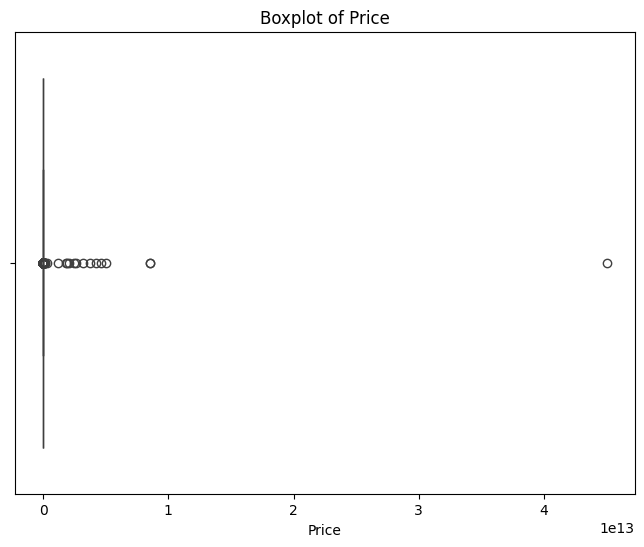

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


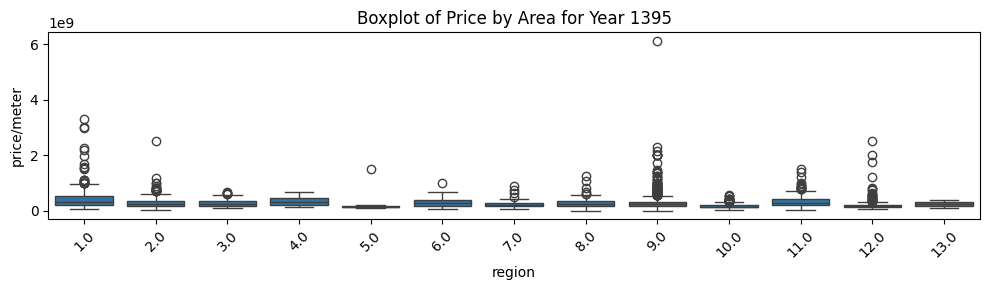

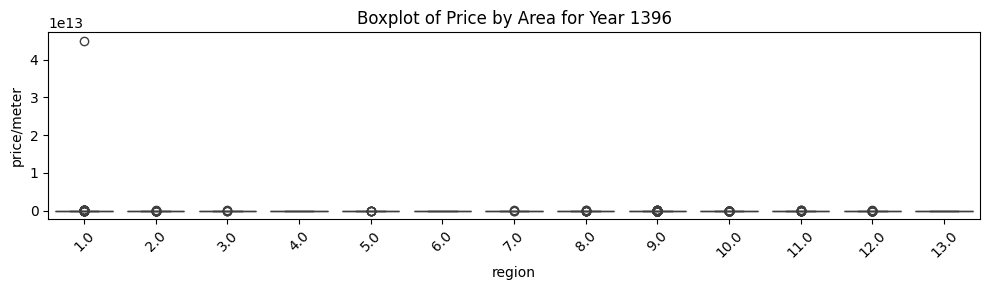

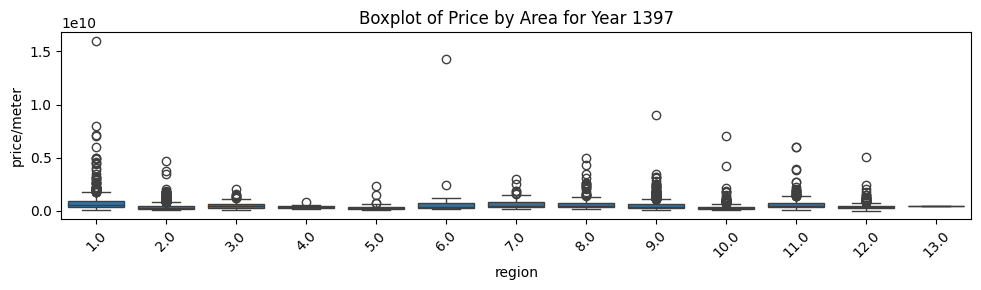

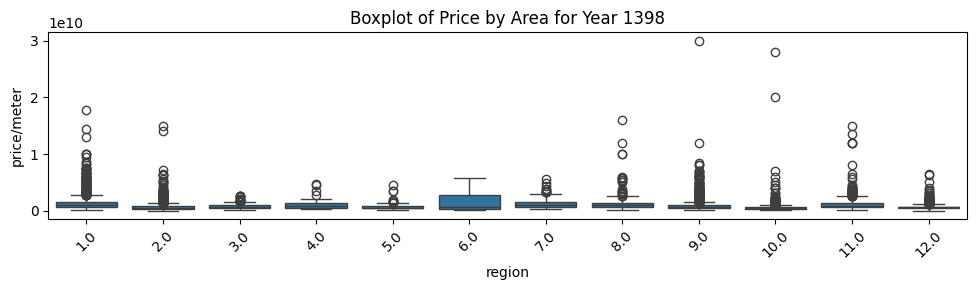

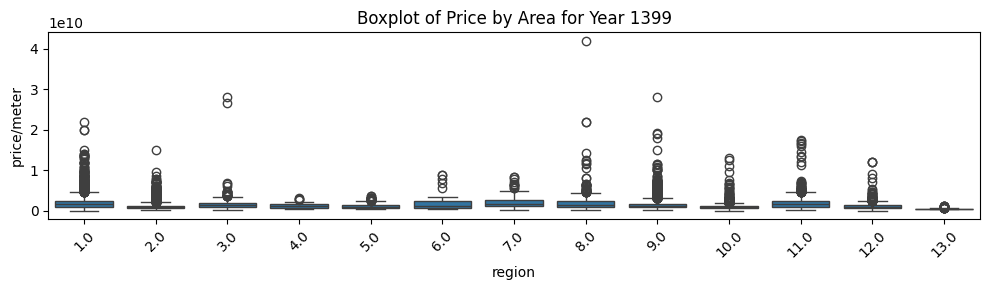

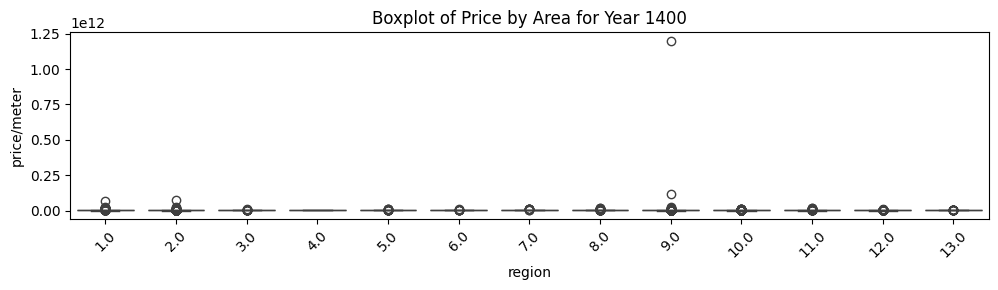

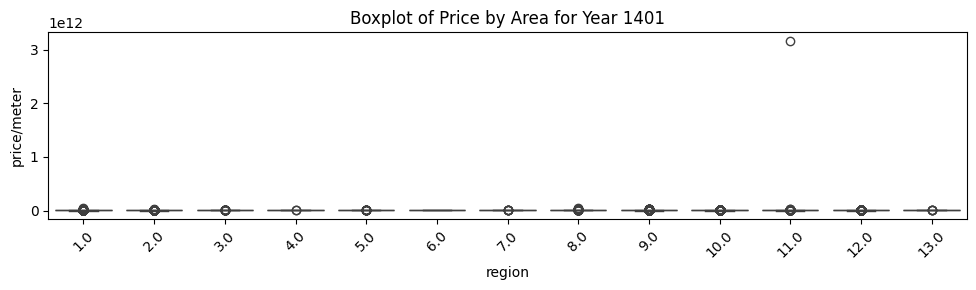

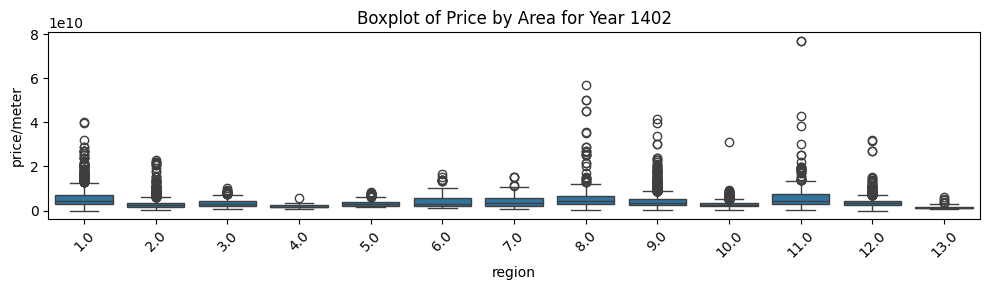

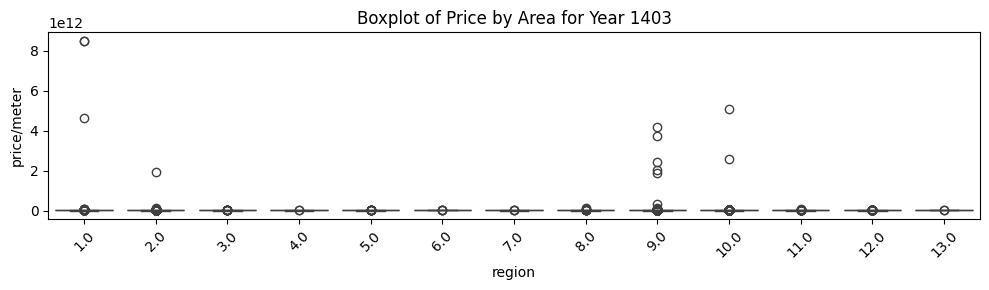

In [41]:
if 'year' not in df.columns:
    def extract_year(date):
        if pd.isna(date):
            return None
        try:
            return date.split('/')[0]
        except (IndexError, AttributeError):
            return None
    df['year'] = df['date'].apply(extract_year)
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    
years = range(1395, 1404)  # شامل 1403

# حلقه برای رسم باکس‌پلات برای هر سال
for year in years:
    # فیلتر کردن داده‌ها برای سال خاص
    df_year = df[df['year'] == year]
    
    if not df_year.empty:  # اگر داده‌ای برای سال وجود دارد
        # تنظیم فیگور
        plt.figure(figsize=(10, 3))
        
        # رسم باکس‌پلات
        sns.boxplot(data=df_year, x='region', y='price')
        
        # تنظیم عنوان و برچسب‌ها
        plt.title(f'Boxplot of Price by Area for Year {year}')
        plt.xlabel('region')
        plt.ylabel('price/meter')
        plt.xticks(rotation=45)  # چرخاندن برچسب‌ها برای خوانایی
        
        # نمایش فیگور
        plt.tight_layout()
        plt.show()
    else:
        print(f"هیچ داده‌ای برای سال {year} وجود ندارد.")

In [3]:
import pandas as pd

df.loc[df['price'] == 0, 'price'] = np.nan
df.loc[df['price'] < 1000000, 'price'] = np.nan

# تعریف شرط برای قیمت‌های بین ۱,۰۰۰,۰۰۰ و کمتر از (area * price)
mask1 = (df['price'] >= 1000000) & (df['price'] < 30000000)
df.loc[mask1, 'price'] = df.loc[mask1, 'price'] * df.loc[mask1, 'area']

mask2 = (df['price'] >= 30000000) & (df['price'] < 100000000) & (df['year'] <= 1401) & (df['price'] < df['mean_region_price'])
df.loc[mask2, 'price'] = df.loc[mask2, 'price'] * df.loc[mask2, 'area']

mask3 = (df['price'] >= 30000000) & (df['price'] < 100000000) & (df['year'] > 1401)
df.loc[mask3, 'price'] = df.loc[mask3, 'price'] * df.loc[mask3, 'area']

# تابع برای شناسایی و حذف پرت‌ها در هر گروه
def remove_outliers(group):
    Q1 = group['price'].quantile(0.2)
    Q3 = group['price'].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    # فقط پرت‌ها رو حذف می‌کنیم و null‌ها رو نگه می‌داریم
    return group[(group['price'].isna()) | 
                 (group['price'] >= lower_bound) & 
                 (group['price'] <= upper_bound)]

# گروه‌بندی بر اساس سال و منطقه و حذف پرت‌ها
df = df.groupby(['year', 'region']).apply(remove_outliers).reset_index(drop=True)
# تبدیل قیمت‌های کمتر از ۱,۰۰۰,۰۰۰ به مقدار NaN

# دیتافریم تمیز شده آماده استفاده است
# می‌تونی با df_cleaned کار کنی یا ذخیره‌ش کنی
# df_cleaned.to_csv('cleaned_dataset.csv', index=False)

2398    34000000.0
3039    38000000.0
2883    39000000.0
2987    39000000.0
3153    39000000.0
2887    40000000.0
2927    42000000.0
3198    43000000.0
4236    43000000.0
2905    44000000.0
Name: price, dtype: float64


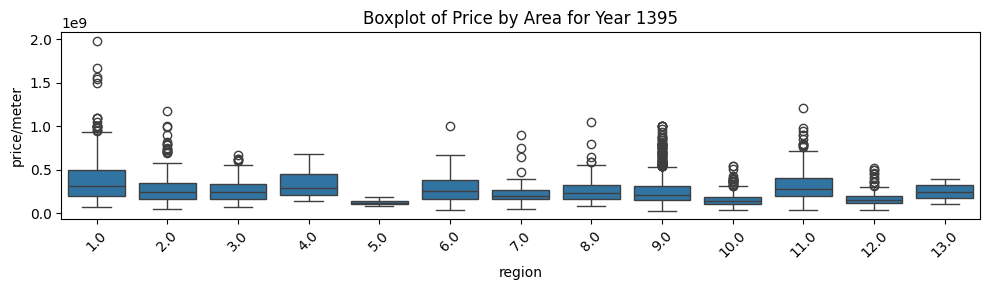

5019     35000000.0
9719     35000000.0
8772     38000000.0
7981     40000000.0
8781     40000000.0
10854    40000000.0
11588    40000000.0
11643    42000000.0
9287     43000000.0
9653     43000000.0
Name: price, dtype: float64


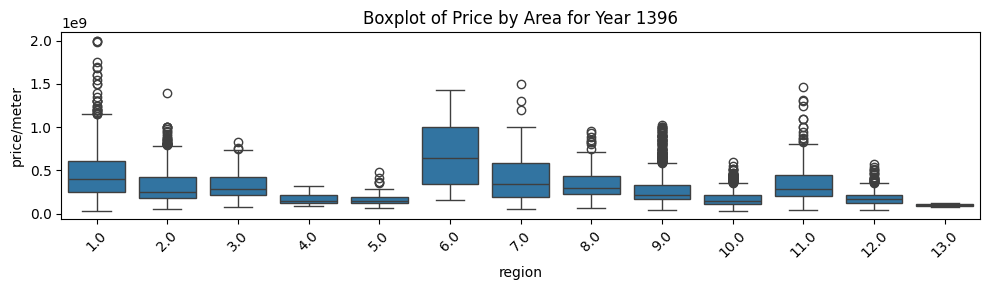

13434    30000000.0
17271    36000000.0
17558    38000000.0
17566    40000000.0
17431    43000000.0
17586    45000000.0
19782    45000000.0
15687    46000000.0
19733    46000000.0
17777    47000000.0
Name: price, dtype: float64


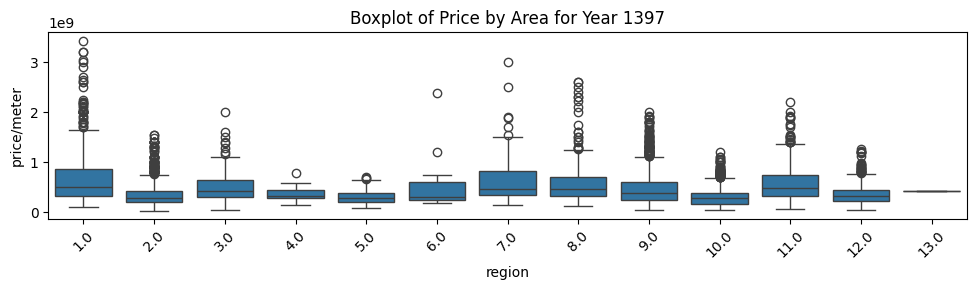

25359    30000000.0
29440    45000000.0
27346    55000000.0
30241    60000000.0
39120    60000000.0
49152    61000000.0
22129    65000000.0
35637    68000000.0
29495    70000000.0
31553    70000000.0
Name: price, dtype: float64


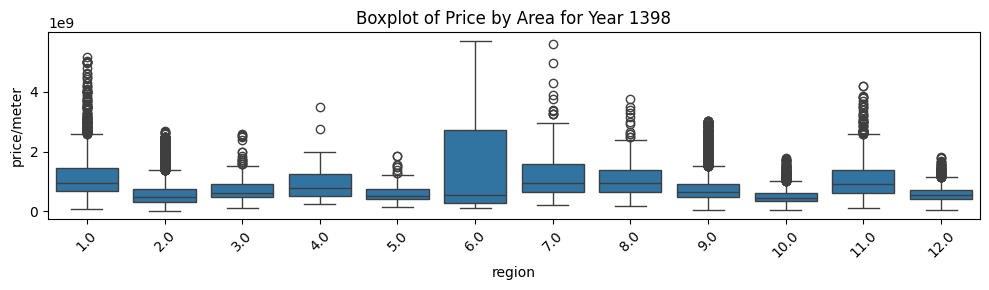

66835     75000000.0
72780     75690000.0
76952     90000000.0
85045    111300000.0
63907    125000000.0
66008    130000000.0
56453    140000000.0
64536    140000000.0
66479    140000000.0
72386    140000000.0
Name: price, dtype: float64


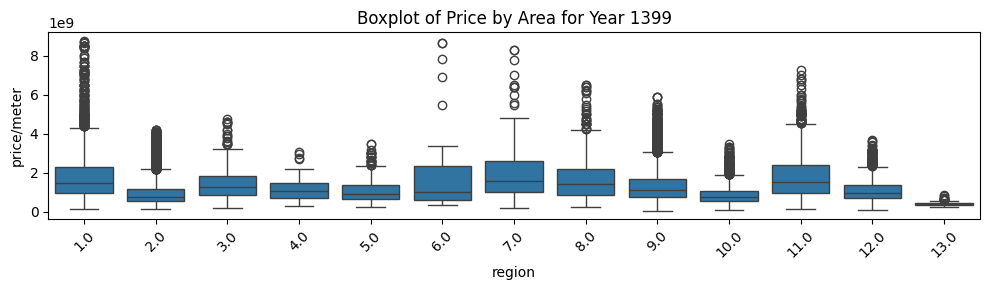

93180      60000000.0
102305     70000000.0
91215      85000000.0
98199      85000000.0
116117     90000000.0
100144     93600000.0
105991    100000000.0
105993    100000000.0
100371    150000000.0
109279    150000000.0
Name: price, dtype: float64


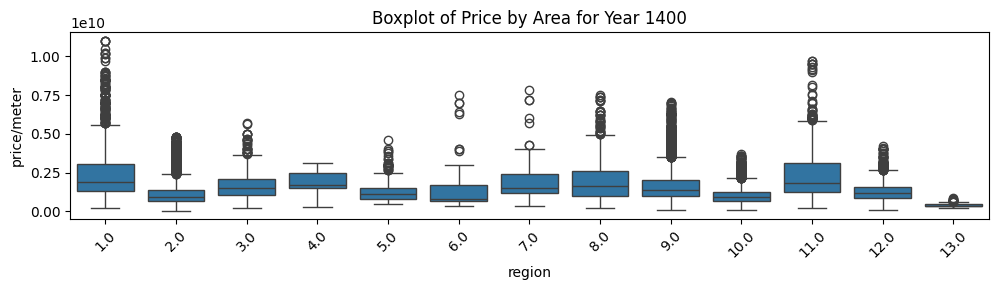

124825     66700000.0
127142     75500000.0
138009     80000000.0
147455     85000000.0
147463     85000000.0
124226     88000000.0
140842    120000000.0
122160    141900000.0
124829    150000000.0
125768    150000000.0
Name: price, dtype: float64


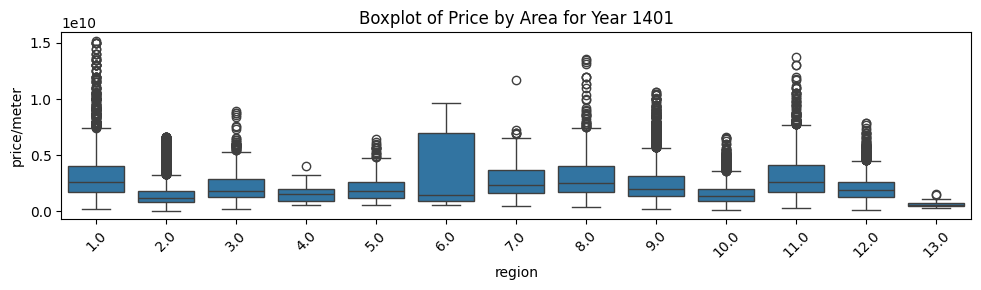

154461    150000000.0
174163    150000000.0
154952    200000000.0
154959    200000000.0
174642    220000000.0
163928    250000000.0
186265    250000000.0
167953    320000000.0
175928    330000000.0
175945    330000000.0
Name: price, dtype: float64


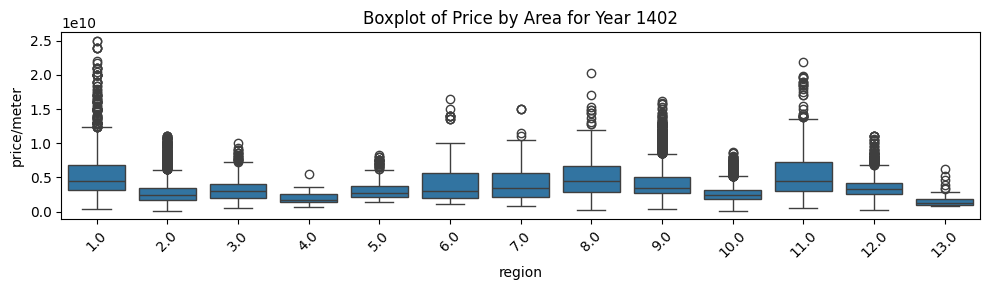

196216    100000000.0
196250    100000000.0
199134    100000000.0
207224    100000000.0
198256    108000000.0
206590    110000000.0
206593    110000000.0
201310    111111111.0
208054    136500000.0
213137    139500000.0
Name: price, dtype: float64


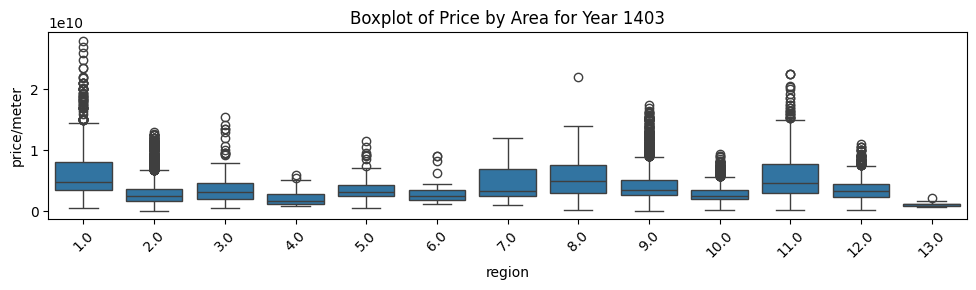

In [6]:
if 'year' not in df.columns:
    def extract_year(date):
        if pd.isna(date):
            return None
        try:
            return date.split('/')[0]
        except (IndexError, AttributeError):
            return None
    df['year'] = df['date'].apply(extract_year)
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    
years = range(1395, 1404)  # شامل 1403

# حلقه برای رسم باکس‌پلات برای هر سال
for year in years:
    # فیلتر کردن داده‌ها برای سال خاص
    df_year = df[df['year'] == year]
    print(df_year['price'].nsmallest(10))
    if not df_year.empty:  # اگر داده‌ای برای سال وجود دارد
        # تنظیم فیگور
        plt.figure(figsize=(10, 3))
        
        # رسم باکس‌پلات
        sns.boxplot(data=df_year, x='region', y='price')
        
        # تنظیم عنوان و برچسب‌ها
        plt.title(f'Boxplot of Price by Area for Year {year}')
        plt.xlabel('region')
        plt.ylabel('price/meter')
        plt.xticks(rotation=45)  # چرخاندن برچسب‌ها برای خوانایی
        
        # نمایش فیگور
        plt.tight_layout()
        plt.show()
    else:
        print(f"هیچ داده‌ای برای سال {year} وجود ندارد.")

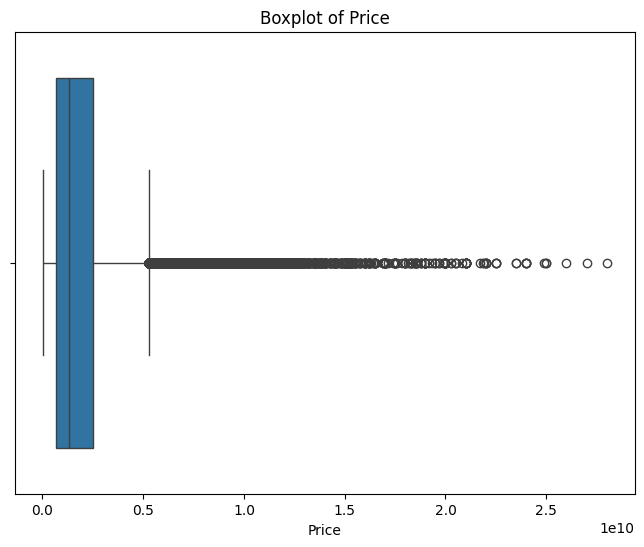

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


In [8]:
df.shape

(222298, 34)

In [8]:
df.columns

Index(['link', 'date', 'address', 'area', 'floors_sum', 'floor_num', 'rooms',
       'property_direction', 'view', 'flooring', 'wall', 'cabinet', 'cooler',
       'age', 'elevator', 'parking', 'desc', 'price', 'facilities', 'Dollar',
       'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe', 'warmer',
       'uni_facilities', 'facility_count', 'month', 'year',
       'sequential_month'],
      dtype='object')

In [10]:
df.isna().sum()

link                      0
date                      0
address                   0
area                      0
floors_sum                0
floor_num                 0
rooms                     0
property_direction        0
view                      0
flooring                  0
wall                      0
cabinet                   0
cooler                    0
age                       0
elevator                  0
parking                   0
desc                  63376
price                 33070
facilities             9118
Dollar                    0
geram18                   0
geram24                   0
region                    0
Warehouse                 0
Wardrobe                  0
warmer                85030
uni_facilities        15979
facility_count            0
month                     0
year                      0
sequential_month          0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13048\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13048\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13048\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13048\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13048\2109502010.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\L

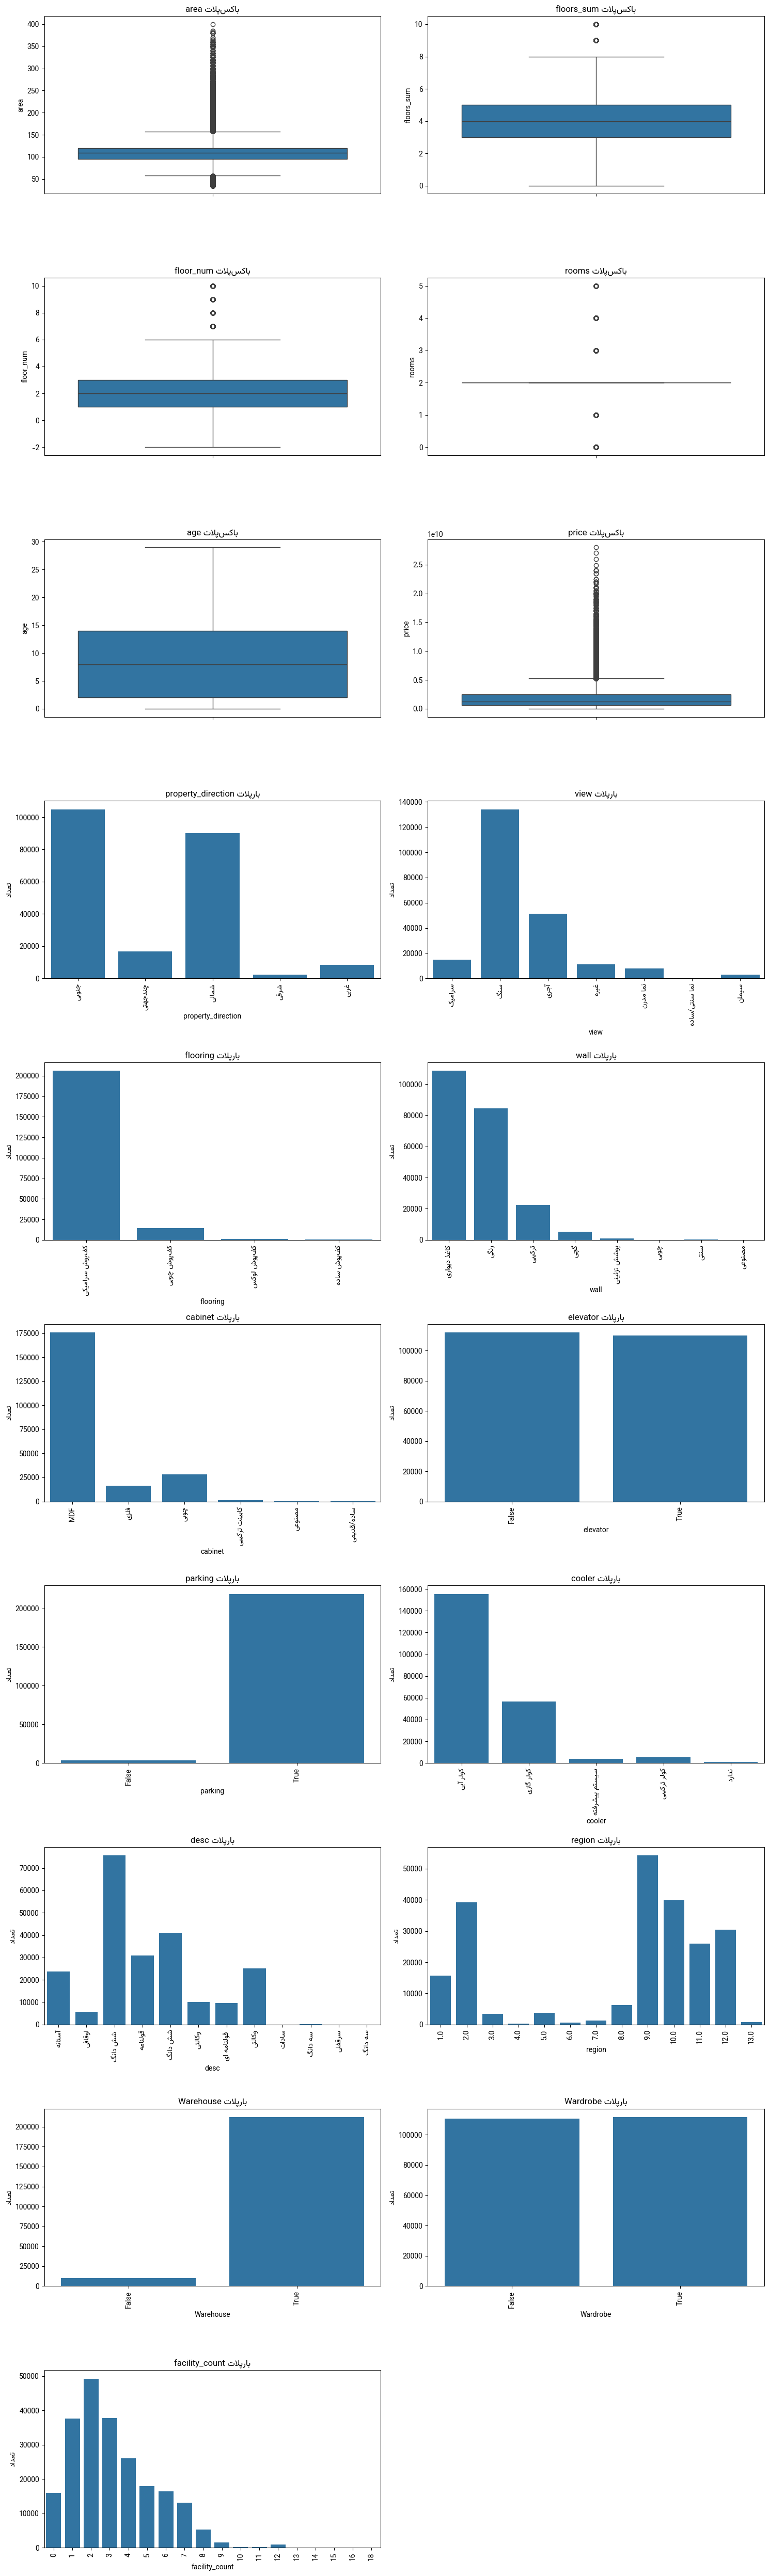

In [5]:
from matplotlib import font_manager
font_path = '../fonts/Vazirmatn-Regular.ttf' 
if not font_path:
    # اگه فونت رو نصب کردی، فقط اسم فونت رو بذار
    font_name = 'Vazirmatn'
else:
    font_manager.fontManager.addfont(font_path)
    font_name = font_manager.FontProperties(fname=font_path).get_name()

def persian_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)
# تنظیم فونت پیش‌فرض برای matplotlib
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
numeric_columns = ['area', 'floors_sum', 'floor_num', 'rooms', 'age','price']
categorical_columns = ['property_direction', 'view', 'flooring', 'wall', 'cabinet','elevator', 'parking', 'cooler','desc','region', 'Warehouse', 'Wardrobe','facility_count']
all_columns = numeric_columns + categorical_columns  # 11 ستون

# 4. تنظیمات چیدمان (2 نمودار در هر سطر)
n_cols = 2  # تعداد ستون‌ها در هر سطر
n_rows = (len(all_columns) + 1) // 2  # تعداد سطرها (11 نمودار → 6 سطر)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # تبدیل به آرایه یک‌بعدی برای دسترسی راحت‌تر

# 5. رسم نمودارها
for i, column in enumerate(all_columns):
    if column in numeric_columns:
        # باکس‌پلات برای ستون‌های عددی
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(persian_text(f'باکس‌پلات {column}'))
        axes[i].set_ylabel(persian_text(column))
    else:
        # بارپلات برای ستون‌های دسته‌ای
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(persian_text(f'بارپلات {column}'))
        axes[i].set_xlabel(persian_text(column))
        axes[i].set_ylabel(persian_text('تعداد'))
        axes[i].tick_params(axis='x', rotation=90)
        # تنظیم برچسب‌های محور x برای نمایش درست فارسی
        labels = axes[i].get_xticklabels()
        new_labels = [persian_text(label.get_text()) for label in labels]
        axes[i].set_xticklabels(new_labels, rotation=90)

# 6. حذف محورهای اضافی (اگه تعداد نمودارها فرد باشه)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 7. تنظیم فاصله‌ها و نمایش
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# ستون‌های کتگوریکال که می‌خواهیم عددی کنیم
categorical_columns = ['property_direction', 'view', 'flooring', 'wall', 'cabinet', 'cooler']

# تابع برای تبدیل کتگوریکال به عددی بر اساس میانگین قیمت (از بالا به پایین)
def encode_categorical_by_price(df, column):
    # محاسبه میانگین قیمت برای هر دسته
    price_means = df.groupby(column)['price'].median().sort_values(ascending=False)
    
    # نمایش میانگین‌ها برای بررسی
    print(f"\nمیانگین قیمت برای ستون {column}:")
    print(price_means)
    
    # تعداد دسته‌ها
    n_categories = len(price_means)
    
    # تخصیص اعداد به دسته‌ها (بزرگ‌تر برای قیمت بالاتر)
    category_to_int = {category: n_categories - idx for idx, category in enumerate(price_means.index)}
    
    # نمایش نگاشت برای بررسی
    print(f"نگاشت برای ستون {column}:")
    print(category_to_int)
    
    # جایگزینی مقادیر کتگوریکال با اعداد
    df[column + '_encoded'] = df[column].map(category_to_int)
    
    return df

# اعمال تابع برای هر ستون کتگوریکال
for col in categorical_columns:
    df = encode_categorical_by_price(df, col)


df.loc[df['desc'].isin(['شش دانگ', 'شش دانگ ', 'تک برگی', 'سند سیم سرب',' شش دانگ']), 'desc_encoded'] = 3
df.loc[df['desc'].isin(['قولنامه', 'قولنامه  ای', 'وکالتی',' وکالتی',' قولنامه ای']), 'desc_encoded'] = 2
df.loc[df['desc'].isin(['اوقافی', 'آستانه‌ای،','آستانه', 'شش دانگ وقفی', 'سه دانگ', 'سه دانگ ', 'سرقفلی', 'سادات',' سه دانگ']), 'desc_encoded'] = 1




میانگین قیمت برای ستون property_direction:
property_direction
شمالی      1.350000e+09
جنوبی      1.300000e+09
شرقی       1.300000e+09
غربی       1.162500e+09
چندجهتی    9.500000e+08
Name: price, dtype: float64
نگاشت برای ستون property_direction:
{'شمالی': 5, 'جنوبی': 4, 'شرقی': 3, 'غربی': 2, 'چندجهتی': 1}

میانگین قیمت برای ستون view:
view
سنگ              1.550000e+09
غیره             1.100000e+09
نما مدرن         1.100000e+09
آجری             9.900000e+08
سرامیک           8.200000e+08
نما سنتی/ساده    8.100000e+08
سیمان            7.200000e+08
Name: price, dtype: float64
نگاشت برای ستون view:
{'سنگ': 7, 'غیره': 6, 'نما مدرن': 5, 'آجری': 4, 'سرامیک': 3, 'نما سنتی/ساده': 2, 'سیمان': 1}

میانگین قیمت برای ستون flooring:
flooring
کف‌پوش لوکس       1.950000e+09
کف‌پوش چوبی       1.350000e+09
کف‌پوش سرامیکی    1.280000e+09
کف‌پوش ساده       7.000000e+08
Name: price, dtype: float64
نگاشت برای ستون flooring:
{'کف\u200cپوش لوکس': 4, 'کف\u200cپوش چوبی': 3, 'کف\u200cپوش سرامیکی': 2, 'کف\u200cپ

In [6]:

df['no_elevator_high_building'] = 0 # اول همه رو صفر در نظر می‌گیریم
condition = (df['floors_sum'] > 2) & (df['elevator'] == False)
df.loc[condition, 'no_elevator_high_building'] = 1

df['room_area'] = df['area'] / (df['rooms'] + 0.01)

df['G/D'] = df['geram18'] / df['Dollar']

df['area_value'] = df['area'] * df['mean_region_price']

In [7]:
df.drop(columns=['mean_region_price'], inplace=True)
df['price/meter'] = df['price'] / df['area']
# تابع برای استخراج سال و فصل از تاریخ
def extract_season(date):
    if pd.isna(date):
        return (None, None)
    try:
        year, month, _ = date.split('/')
        year = int(year)
        month = int(month)
        # تعیین فصل بر اساس ماه
        if 1 <= month <= 3:
            season = 1
        elif 4 <= month <= 6:
            season = 2
        elif 7 <= month <= 9:
            season = 3
        elif 10 <= month <= 12:
            season = 4
        return year, season
    except (IndexError, ValueError, AttributeError):
        return (None, None)

# اعمال تابع برای اضافه کردن ستون‌های year و season
df[['year', 'season']] = df['date'].apply(lambda x: pd.Series(extract_season(x)))

# تبدیل year به عدد
df['year'] = pd.to_numeric(df['year'], errors='coerce')


# محاسبه میانگین قیمت برای هر سال، فصل و ناحیه
mean_price_by_year_season_area = df.groupby(['year', 'season', 'region'])['price/meter'].mean().reset_index()
mean_price_by_year_season_area = mean_price_by_year_season_area.rename(columns={'price/meter': 'mean_region_price'})

# ادغام میانگین با دیتافریم اصلی
df = df.merge(mean_price_by_year_season_area, on=['year', 'season', 'region'], how='left')


In [9]:
df.isna().sum()

link                              0
date                              0
address                           0
area                              0
floors_sum                        0
floor_num                         0
rooms                             0
property_direction                0
view                              0
flooring                          0
wall                              0
cabinet                           0
cooler                            0
age                               0
elevator                          0
parking                           0
desc                              0
price                         33141
facilities                     9118
Dollar                            0
geram18                           0
geram24                           0
region                            0
Warehouse                         0
Wardrobe                          0
warmer                        85082
uni_facilities                15983
facility_count              

In [9]:
df.columns

Index(['link', 'date', 'address', 'area', 'floors_sum', 'floor_num', 'rooms',
       'property_direction', 'view', 'flooring', 'wall', 'cabinet', 'cooler',
       'age', 'elevator', 'parking', 'desc', 'price', 'facilities', 'Dollar',
       'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe', 'warmer',
       'uni_facilities', 'facility_count', 'month', 'year', 'sequential_month',
       'property_direction_encoded', 'view_encoded', 'flooring_encoded',
       'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'price/meter',
       'season', 'mean_region_price'],
      dtype='object')

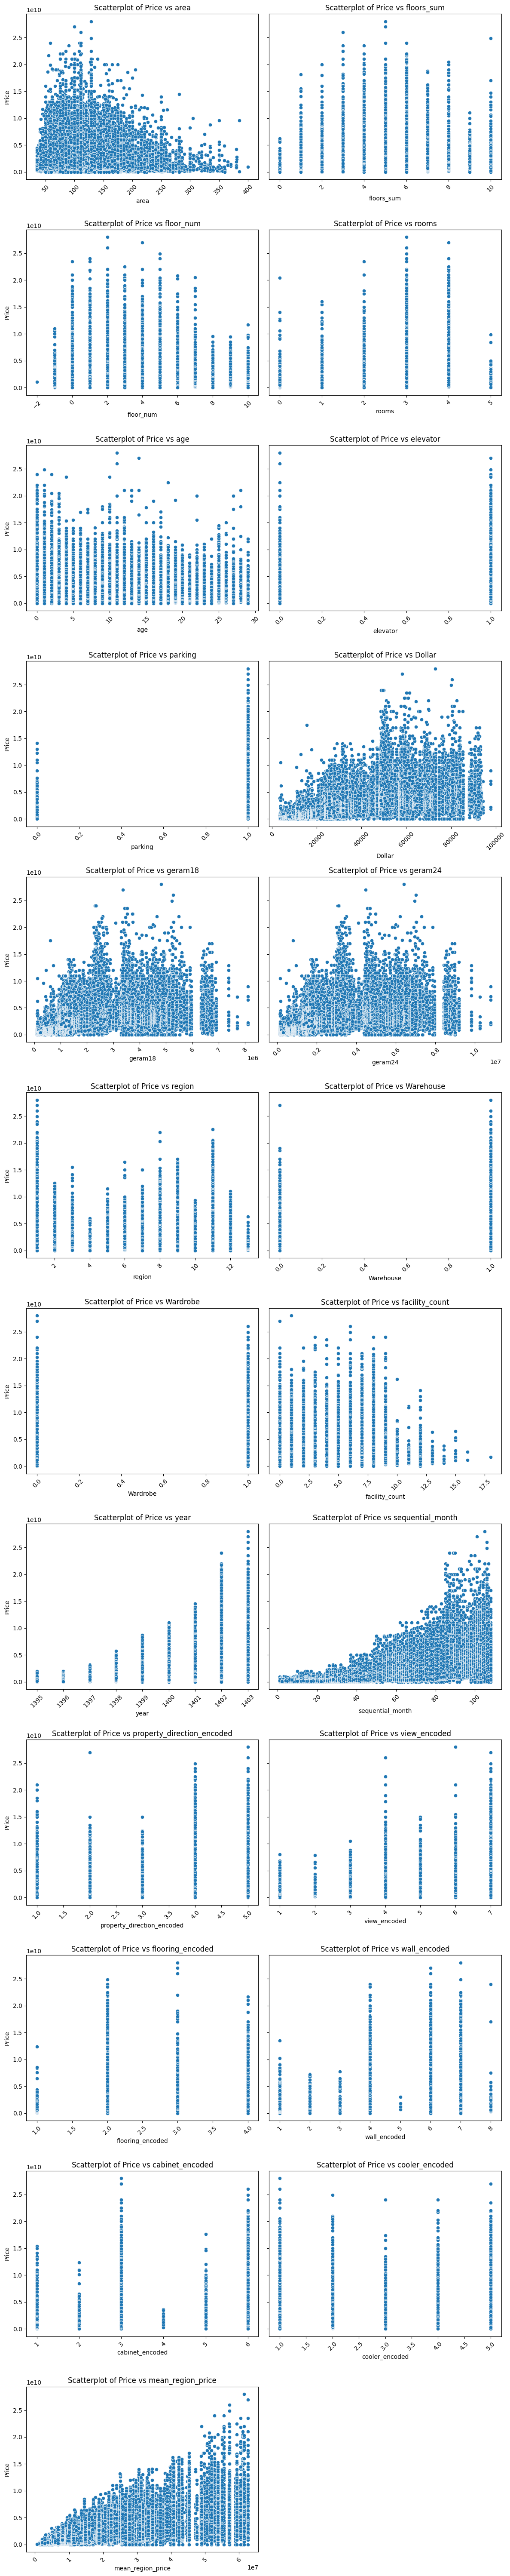

In [12]:
import math
selected_columns = ['area', 'floors_sum', 'floor_num', 'rooms','age', 'elevator', 'parking','Dollar',
       'geram18', 'geram24', 'region', 'Warehouse', 'Wardrobe','facility_count','year', 'sequential_month','property_direction_encoded', 'view_encoded', 'flooring_encoded',
       'wall_encoded', 'cabinet_encoded', 'cooler_encoded','mean_region_price']

# تعداد ستون‌ها و محاسبه تعداد سطرها (هر سطر 2 فیگور)
n_cols = len(selected_columns)
n_rows = math.ceil(n_cols / 2)  # تعداد سطرها (تقسیم بر 2 و رند به بالا)

# تنظیم فیگور با زیرپلات‌ها (هر سطر 2 ستون)
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12, 5 * n_rows), sharey=True)

# اگر فقط یک سطر باشد، axes را به لیست تبدیل می‌کنیم
if n_rows == 1:
    axes = [axes]

# حلقه برای رسم اسکترپلات برای هر ستون انتخابی
for idx, col in enumerate(selected_columns):
    row = idx // 2  # شماره سطر
    col_idx = idx % 2  # شماره ستون (0 یا 1)
    
    # دسترسی به محور مربوطه
    ax = axes[row][col_idx] if n_rows > 1 else axes[col_idx]
    
    # رسم اسکترپلات
    sns.scatterplot(data=df, x=col, y='price', ax=ax)
    
    # تنظیم عنوان و برچسب‌ها
    ax.set_title(f'Scatterplot of Price vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Price' if col_idx == 0 else '')  # فقط ستون سمت چپ برچسب y دارد
    
    # چرخاندن برچسب‌های محور x برای خوانایی
    ax.tick_params(axis='x', rotation=45)

# حذف زیرپلات‌های خالی (اگر تعداد ستون‌ها فرد باشد)
if n_cols % 2 != 0:
    ax = axes[-1][-1]
    fig.delaxes(ax)

# تنظیم فاصله‌ها و نمایش فیگور
plt.tight_layout()
plt.show()

# Fit a regression model to fill missing house prices

In [48]:
# 2-find the most realted features to fill the missing values
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')


,area,floors_sum,floor_num,rooms,age,elevator,parking,price,Dollar,geram18,geram24,region,Warehouse,Wardrobe,facility_count,month,year,sequential_month,property_direction_encoded,view_encoded,flooring_encoded,wall_encoded,cabinet_encoded,cooler_encoded,desc_encoded,price/meter,no_elevator_high_building,room_area,G/D,season,mean_region_price,area_value
area,1.000000,-0.002108,-0.006636,0.003064,-0.008893,0.002447,0.013127,-0.055307,-0.106022,-0.098902,-0.098895,0.011684,0.033896,0.017792,0.031102,0.035508,-0.115138,-0.110405,-0.023161,0.007713,0.011315,0.005191,-0.016993,-0.005957,0.014620,-0.282026,-0.003051,0.042981,-0.126705,0.040636,-0.101978,0.263409
floors_sum,-0.002108,1.000000,0.416885,0.278953,-0.481341,0.605396,0.073659,0.251736,0.054230,0.050035,0.050026,0.075215,0.015306,0.055286,0.216951,0.008286,0.057204,0.058421,-0.027912,0.295450,-0.036716,0.077950,0.323243,0.357802,0.043763,0.231706,-0.382315,-0.054628,0.049065,0.007710,0.063540,0.058759
floor_num,-0.006636,0.416885,1.000000,0.177219,-0.183461,0.243061,0.036460,0.100746,0.039521,0.040235,0.040224,0.034705,0.002913,0.032829,0.106591,0.002035,0.036916,0.037245,-0.020405,0.117385,-0.015575,0.041469,0.127966,0.115924,0.031676,0.095056,-0.119903,-0.047044,0.038584,0.001845,0.033483,0.028829
rooms,0.003064,0.278953,0.177219,1.000000,-0.178822,0.363261,0.117999,0.436372,-0.004403,-0.001460,-0.001479,0.061838,0.050117,0.080358,0.277310,0.005778,-0.012160,-0.011381,0.008023,0.272091,0.041000,0.154552,0.329033,0.266712,0.051495,0.399568,-0.293263,-0.220084,-0.005689,0.005224,0.068002,0.063287
age,-0.008893,-0.481341,-0.183461,-0.178822,1.000000,-0.573540,0.008064,-0.105276,0.063904,0.059787,0.059791,-0.063942,-0.006118,0.010784,-0.176565,-0.003349,0.072548,0.072184,-0.004908,-0.360096,0.122005,-0.039839,-0.386159,-0.397541,0.018019,-0.097555,0.497205,0.009026,0.065203,-0.002205,0.087375,0.079948
elevator,0.002447,0.605396,0.243061,0.363261,-0.573540,1.000000,0.087474,0.294294,0.022217,0.020274,0.020266,0.098249,0.018860,0.057150,0.270565,0.002303,0.022471,0.022818,-0.013659,0.421935,-0.030053,0.119163,0.350398,0.421624,0.069114,0.270447,-0.874802,-0.042669,0.017452,0.001919,0.044965,0.041123
parking,0.013127,0.073659,0.036460,0.117999,0.008064,0.087474,1.000000,0.024854,-0.135835,-0.153589,-0.153634,0.067317,0.586816,0.127520,0.025134,-0.021502,-0.101487,-0.104583,-0.007459,0.086653,0.016566,0.069732,0.046631,0.035636,0.053659,0.022064,-0.054089,-0.062398,-0.134309,-0.020524,-0.079062,-0.067108
price,-0.055307,0.251736,0.100746,0.436372,-0.105276,0.294294,0.024854,1.000000,0.610335,0.575030,0.574979,-0.010416,-0.093217,0.177842,0.271703,0.014376,0.588750,0.592162,0.064744,0.232764,0.044170,0.126350,0.376815,0.279454,0.069716,0.926774,-0.266476,-0.025887,0.538518,0.016204,0.705040,0.633266
Dollar,-0.106022,0.054230,0.039521,-0.004403,0.063904,0.022217,-0.135835,0.610335,1.000000,0.978576,0.978501,-0.032544,-0.288434,0.175019,0.043785,0.076151,0.931699,0.943429,0.102919,0.019088,-0.015945,0.003401,0.139685,0.063231,0.075921,0.569379,-0.022260,-0.004956,0.920943,0.078036,0.860194,0.772433
geram18,-0.098902,0.050035,0.040235,-0.001460,0.059787,0.020274,-0.153589,0.575030,0.978576,1.000000,0.999986,-0.022335,-0.320713,0.161618,0.026151,0.081194,0.873972,0.886318,0.099079,0.023737,-0.010975,-0.002307,0.125014,0.059747,0.080103,0.535914,-0.020161,-0.003862,0.945136,0.082848,0.815043,0.730541


In [14]:
df.shape

(222162, 40)

In [11]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# فرض می‌کنیم دیتاست اصلی قبلاً بارگذاری شده است
# df = pd.read_csv('your_dataset.csv')

# ستون‌های مختلف برای نرمال‌سازی
categorical_columns = ['property_direction_encoded', 'view_encoded', 'flooring_encoded', 
                       'wall_encoded', 'cabinet_encoded', 'cooler_encoded','desc_encoded']
numeric_columns = ['floors_sum', 'floor_num', 'rooms', 'area', 'age', 'year', 
                   'sequential_month', 'facility_count','region','room_area','G/D']
large_columns = ['mean_region_price', 'geram18','Dollar','area_value', 'price']
boolean_columns = ['elevator', 'parking', 'Warehouse', 'Wardrobe','no_elevator_high_building']

# حذف سطرهای با NaN در ستون‌های کلیدی
columns_to_check = categorical_columns + numeric_columns + large_columns + boolean_columns
hf = df.dropna(subset=[col for col in columns_to_check if col in df.columns])

print(hf.shape)

# دیتاست جدید برای ذخیره داده‌های نرمال‌شده
df_scaled = pd.DataFrame(index=hf.index)  # تنظیم اندیس با دیتافریم اصلی

# دیکشنری برای ذخیره مقادیر لازم برای برگشت‌پذیری
scaling_params = {}

# 1. نرمال‌سازی ستون‌های کتگوریکال و عددی با Min-Max Scaling
minmax_scaler = MinMaxScaler()
for col in categorical_columns + numeric_columns:
    if col in hf.columns:
        # نرمال‌سازی
        # df_scaled[col] = minmax_scaler.fit_transform(hf[[col]])
        df_scaled[col] =hf[[col]]
        # ذخیره مقادیر برای برگشت‌پذیری
        scaling_params[f'{col}_min'] = hf[col].min()
        scaling_params[f'{col}_max'] = hf[col].max()

# 2. مدیریت ستون‌های بولی (تبدیل به 0 و 1)
for col in boolean_columns:
    if col in hf.columns:
        # تبدیل True/False یا 1/0 به مقادیر 0 و 1
        df_scaled[col] = hf[col].astype(int)

# 3. نرمال‌سازی ستون‌های بزرگ (price, mean_region_price, geram18, geram24, Dollar) با لگاریتم و سپس Robust Scaling
robust_scaler = RobustScaler()
for col in large_columns:
    if col in hf.columns:
        # اعمال تبدیل لگاریتمی
        df_scaled[col] = np.log1p(hf[col])  # log1p برای مدیریت مقادیر صفر
        # نرمال‌سازی با RobustScaler
        # df_scaled[col] = robust_scaler.fit_transform(log_values.values.reshape(-1, 1))
        # ذخیره مقادیر برای برگشت‌پذیری
        # scaling_params[f'{col}_log_median'] = log_values.median()
        # scaling_params[f'{col}_log_iqr'] = log_values.quantile(0.75) - log_values.quantile(0.25)

df_scaled.head()

(189157, 45)


,property_direction_encoded,view_encoded,flooring_encoded,wall_encoded,cabinet_encoded,cooler_encoded,desc_encoded,floors_sum,floor_num,rooms,area,age,year,sequential_month,facility_count,region,room_area,G/D,elevator,parking,Warehouse,Wardrobe,no_elevator_high_building,mean_region_price,geram18,Dollar,area_value,price
0,4,3,2,6,3,1,2.0,4.0,2.0,2.0,125,2.0,1395,1,2,1.0,62.189055,30.326778,1,1,1,0,0,14.651567,11.560486,8.148735,19.478825,18.560443
1,4,7,2,6,3,5,1.0,10.0,4.0,2.0,111,0.0,1395,2,3,1.0,55.223881,30.063419,1,1,1,0,0,14.651567,11.554940,8.151910,19.360041,18.980297
2,1,7,2,6,3,1,1.0,5.0,4.0,2.0,129,5.0,1395,2,3,1.0,64.179104,30.074993,1,1,1,0,0,14.651567,11.554749,8.151333,19.510323,19.231611
3,5,4,2,6,3,1,3.0,4.0,2.0,3.0,88,14.0,1395,2,3,1.0,29.235880,30.182081,0,1,1,0,1,14.651567,11.556282,8.149313,19.127848,19.502486
4,3,7,2,4,3,1,1.0,4.0,1.0,2.0,111,12.0,1395,2,1,1.0,55.223881,30.254335,1,1,1,0,0,14.651567,11.558673,8.149313,19.360041,19.138521


In [12]:
# 2-find the most realted features to fill the missing values
corr = df_scaled.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,property_direction_encoded,view_encoded,flooring_encoded,wall_encoded,cabinet_encoded,cooler_encoded,desc_encoded,floors_sum,floor_num,rooms,area,age,year,sequential_month,facility_count,region,room_area,G/D,elevator,parking,Warehouse,Wardrobe,no_elevator_high_building,mean_region_price,geram18,Dollar,area_value,price
property_direction_encoded,1.000000,0.025669,-0.008819,-0.012314,0.034122,-0.004754,-0.080769,-0.032922,-0.023522,0.007410,-0.018104,-0.004092,0.099062,0.100358,-0.046538,-0.043822,-0.009147,0.099989,-0.015415,-0.003403,-0.017093,-0.088638,0.014515,0.104551,0.099334,0.095794,0.094265,0.076765
view_encoded,0.025669,1.000000,-0.008709,0.134319,0.261611,0.265130,0.063452,0.293049,0.115951,0.270716,0.018285,-0.362664,-0.000736,0.000811,0.210089,0.087867,-0.020604,0.007523,0.425100,0.060967,0.027330,0.097500,-0.363534,0.041888,-0.002823,-0.004038,0.046753,0.237086
flooring_encoded,-0.008819,-0.008709,1.000000,0.083860,0.001874,0.002391,0.036446,-0.036016,-0.016446,0.041834,0.013538,0.118483,-0.038414,-0.037705,0.058761,-0.015963,0.000792,-0.031278,-0.029344,0.014707,0.010298,0.043438,0.027043,-0.010045,-0.041119,-0.040704,0.001653,0.028711
wall_encoded,-0.012314,0.134319,0.083860,1.000000,0.166156,0.133382,0.121986,0.070643,0.038505,0.149944,0.009197,-0.028393,0.014732,0.016142,0.224768,0.025399,-0.027526,-0.000631,0.111454,0.051302,0.060162,0.208887,-0.086086,0.039839,0.004756,0.005431,0.039535,0.138336
cabinet_encoded,0.034122,0.261611,0.001874,0.166156,1.000000,0.323751,0.010534,0.316159,0.124993,0.321478,-0.002266,-0.379664,0.143399,0.145514,0.261881,0.051858,-0.036703,0.121365,0.345111,0.044594,0.015642,0.068753,-0.287942,0.179212,0.143566,0.144101,0.163325,0.358351
cooler_encoded,-0.004754,0.265130,0.002391,0.133382,0.323751,1.000000,0.020403,0.357445,0.113577,0.264248,0.006837,-0.396756,0.061122,0.063000,0.222735,-0.016311,-0.020497,0.052778,0.422088,0.031194,0.002430,0.062959,-0.369988,0.088343,0.057649,0.057733,0.084754,0.266060
desc_encoded,-0.080769,0.063452,0.036446,0.121986,0.010534,0.020403,1.000000,0.041447,0.028557,0.030937,0.019683,0.002469,0.020593,0.024232,0.244181,0.260975,-0.012718,0.020412,0.066684,0.032439,0.059482,0.392818,-0.050854,-0.036687,0.000657,0.000492,-0.031319,0.020746
floors_sum,-0.032922,0.293049,-0.036016,0.070643,0.316159,0.357445,0.041447,1.000000,0.414842,0.273294,0.007832,-0.482666,0.053528,0.054504,0.212033,0.075266,-0.052504,0.044701,0.603859,0.063096,0.016640,0.047864,-0.381030,0.063284,0.050237,0.050169,0.057874,0.230993
floor_num,-0.023522,0.115951,-0.016446,0.038505,0.124993,0.113577,0.028557,0.414842,1.000000,0.175109,-0.003810,-0.183176,0.034835,0.035147,0.100821,0.035881,-0.046015,0.036776,0.241716,0.028974,-0.001883,0.026482,-0.119668,0.031602,0.033028,0.031668,0.028750,0.098491
rooms,0.007410,0.270716,0.041834,0.149944,0.321478,0.264248,0.030937,0.273294,0.175109,1.000000,0.022242,-0.173809,-0.016756,-0.016084,0.270570,0.057755,-0.218338,-0.009888,0.358284,0.101969,0.047597,0.070878,-0.290324,0.047705,-0.018317,-0.019473,0.054458,0.429419


In [53]:
del model


شروع بهینه‌سازی هایپرپارامترها...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1997
[LightGBM] [Info] Number of data points in the train set: 151325, number of used features: 27
[LightGBM] [Info] Start training from score 20.934381
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

بهترین هایپرپارامترهای پیدا شده:
{'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'num_leaves': 60, 'n_estimators': 1000, 'min_child_samples': 30, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

شروع انتخاب ویژگی با RFECV...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008253 seconds.
You can set `force_row_wise=true` to remove the overhead.

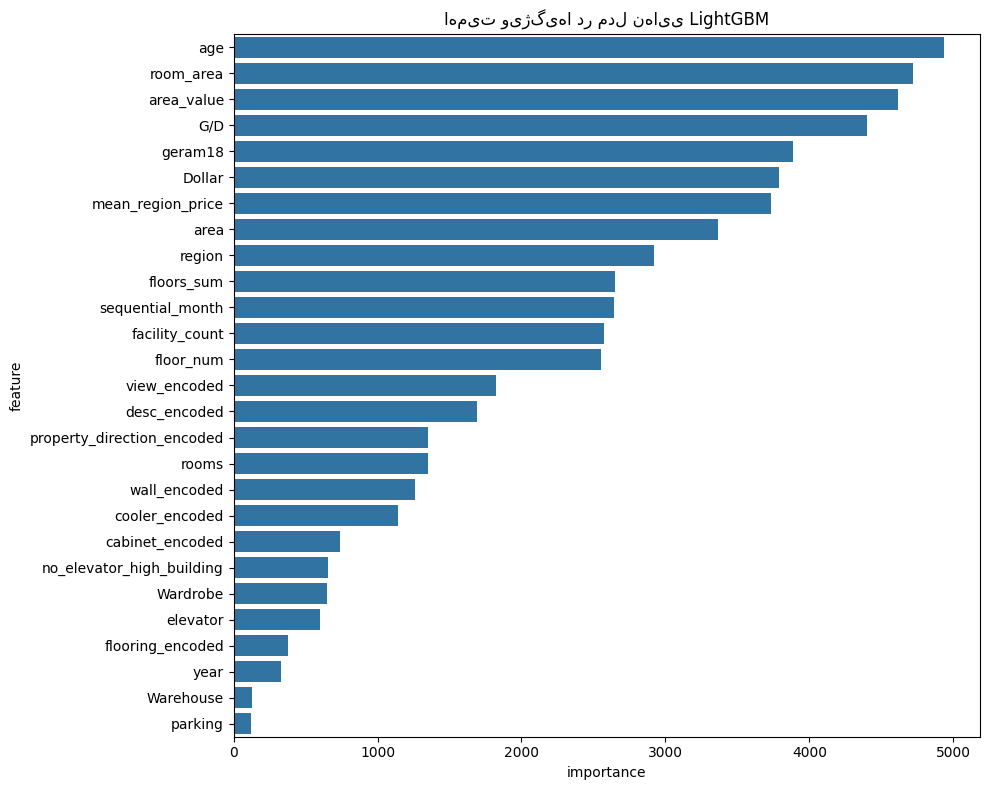

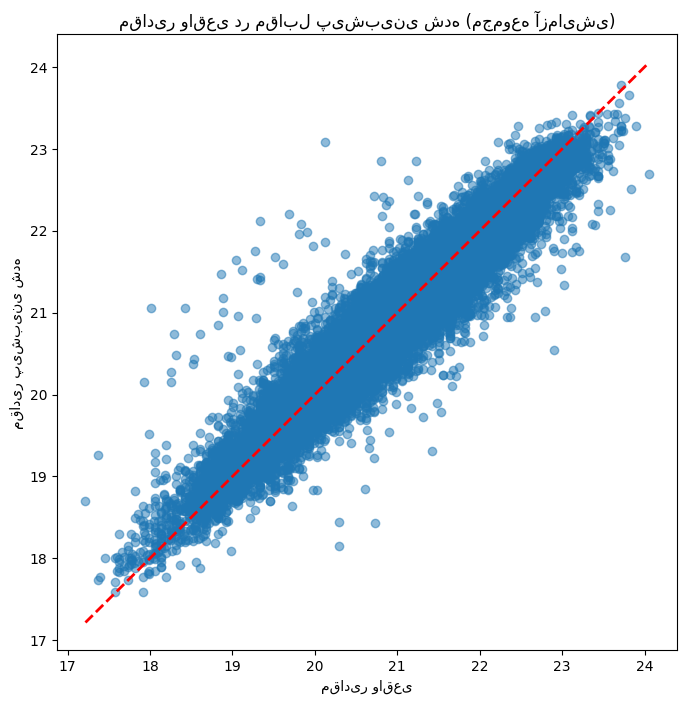

In [14]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns




X = df_scaled.drop(columns=['price'])
y = df_scaled['price']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ---------------------------------------------------------------------------------
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # #  از اینجا به بعد را پس از آماده سازی داده‌ها از کامنت خارج کنید  # # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# ---------------------------------------------------------------------------------

# # -----------------------------------------------------------------------------
# # 2. بهینه‌سازی هایپرپارامترها با RandomizedSearchCV
# # -----------------------------------------------------------------------------
print("\nشروع بهینه‌سازی هایپرپارامترها...")
lgbm_reg = lgb.LGBMRegressor(random_state=42)

# # تعریف فضای جستجوی پارامترها
# # این مقادیر را می‌توانید بر اساس شناخت خود از داده‌ها و مسئله تغییر دهید
param_dist = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 40, 50, 60], # معمولا باید کمتر از 2^max_depth باشد
    'max_depth': [-1, 5, 10, 15, 20], # -1 یعنی بدون محدودیت
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], # bagging_fraction
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], # feature_fraction
    'reg_alpha': [0, 0.1, 0.5, 1], # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1] # L2 regularization
}

# # تعداد تکرارهای جستجوی تصادفی و تعداد فولدهای Cross-Validation
n_iter_search = 50 # می‌توانید این عدد را بیشتر کنید برای جستجوی دقیق‌تر (زمان‌برتر)
cv_folds = 5

random_search = RandomizedSearchCV(
    lgbm_reg,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    cv=KFold(n_splits=cv_folds, shuffle=True, random_state=42),
    scoring='r2', # یا 'neg_mean_squared_error'
    n_jobs=-1, # استفاده از تمام هسته‌های CPU
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("\nبهترین هایپرپارامترهای پیدا شده:")
print(best_params)

# ساخت مدل با بهترین پارامترها برای استفاده در RFECV
best_lgbm_estimator = lgb.LGBMRegressor(**best_params, random_state=42)

# # -----------------------------------------------------------------------------
# # 3. انتخاب بهترین ویژگی‌ها با RFECV
# # -----------------------------------------------------------------------------
print("\nشروع انتخاب ویژگی با RFECV...")
# RFECV به طور خودکار تعداد بهینه ویژگی‌ها را پیدا می‌کند
rfecv_selector = RFECV(
    estimator=best_lgbm_estimator, # یا lgb.LGBMRegressor(random_state=42) اگر نمی‌خواهید از پارامترهای بهینه شده استفاده کنید
    step=1, # در هر مرحله یک ویژگی حذف می‌شود
    cv=KFold(n_splits=cv_folds, shuffle=True, random_state=42), # همان تعداد فولد بالا
    scoring='r2', # یا 'neg_mean_squared_error'
    min_features_to_select=5, # حداقل تعداد ویژگی برای انتخاب (می‌توانید تغییر دهید)
    n_jobs=-1,
    verbose=1
)

rfecv_selector.fit(X_train, y_train)

selected_features_mask = rfecv_selector.support_
selected_features_names = X_train.columns[selected_features_mask]

print(f"\nتعداد ویژگی‌های بهینه انتخاب شده: {rfecv_selector.n_features_}")
print("نام ویژگی‌های انتخاب شده:")
print(list(selected_features_names))

# به‌روزرسانی X_train و X_test با ویژگی‌های انتخاب شده
X_train_selected = X_train[selected_features_names]
X_test_selected = X_test[selected_features_names]


# # -----------------------------------------------------------------------------
# # 4. آموزش مدل نهایی با بهترین هایپرپارامترها و بهترین ویژگی‌ها
# # -----------------------------------------------------------------------------
print("\nآموزش مدل نهایی با بهترین پارامترها و ویژگی‌های انتخاب شده...")
final_model = lgb.LGBMRegressor(**best_params, random_state=42)
final_model.fit(X_train_selected, y_train)

# # -----------------------------------------------------------------------------
# # 5. ارزیابی مدل نهایی
# # -----------------------------------------------------------------------------
print("\nارزیابی مدل نهایی روی مجموعه آزمایشی (Test Set)...")
y_pred_test = final_model.predict(X_test_selected)

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f"\nنتایج ارزیابی نهایی:")
print(f"  R² score: {r2:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")

print("\nبهترین هایپرپارامترهای استفاده شده برای مدل نهایی:")
print(best_params)
print("\nویژگی‌های انتخاب شده برای مدل نهایی:")
print(list(selected_features_names))


# # اختیاری: نمایش اهمیت ویژگی‌های مدل نهایی
if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': selected_features_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title('اهمیت ویژگی‌ها در مدل نهایی LightGBM')
    plt.tight_layout()
    plt.show()

# اختیاری: رسم نمودار مقادیر واقعی در مقابل پیش‌بینی شده
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('مقادیر واقعی')
plt.ylabel('مقادیر پیش‌بینی شده')
plt.title('مقادیر واقعی در مقابل پیش‌بینی شده (مجموعه آزمایشی)')
plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import shap

def plot_enhanced_actual_vs_predicted(y_true, y_pred, title="Actual vs Predicted Values"):
    # Calculate error for color coding
    errors = np.abs(y_true - y_pred)
    
    plt.figure(figsize=(12, 8))
    
    # Create scatter plot with color gradient based on error
    scatter = plt.scatter(y_true, y_pred, 
                         c=errors, 
                         cmap='YlOrRd',  # Yellow to Orange to Red colormap
                         alpha=0.6)
    
    # Add color bar
    plt.colorbar(scatter, label='Absolute Error')
    
    # Add perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 
             'b--', label='Perfect Prediction')
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_enhanced_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    
    plt.figure(figsize=(15, 6))
    
    # Residuals vs Predicted with color coding
    plt.subplot(121)
    scatter = plt.scatter(y_pred, residuals,
                         c=np.abs(residuals),
                         cmap='viridis',  # Blue to Green to Yellow colormap
                         alpha=0.6)
    plt.colorbar(scatter, label='Absolute Residual')
    
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Residuals Distribution
    plt.subplot(122)
    sns.histplot(residuals, kde=True, bins=50)
    plt.axvline(x=0, color='r', linestyle='--', label='Zero Residual')
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.title('Residuals Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    
    

def plot_feature_importance_lgb(model, feature_names):
    
    plt.figure(figsize=(12, 6))
    lgb.plot_importance(model, max_num_features=len(feature_names))
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

def plot_shap_summary(model, X):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X, plot_type="bar")
    plt.tight_layout()
    plt.show()
    

def plot_error_distribution_by_price_range(y_true, y_pred, n_bins=10):
    """Plot error distribution across different price ranges"""
    # Create price ranges
    df = pd.DataFrame({
        'actual': y_true,
        'predicted': y_pred,
        'error': np.abs(y_true - y_pred)
    })
    
    df['price_range'] = pd.qcut(df['actual'], n_bins, labels=[f'Range {i+1}' for i in range(n_bins)])
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='price_range', y='error')
    plt.xticks(rotation=45)
    plt.xlabel('Price Range')
    plt.ylabel('Absolute Error')
    plt.title('Error Distribution Across Price Ranges')
    plt.tight_layout()
    plt.show()



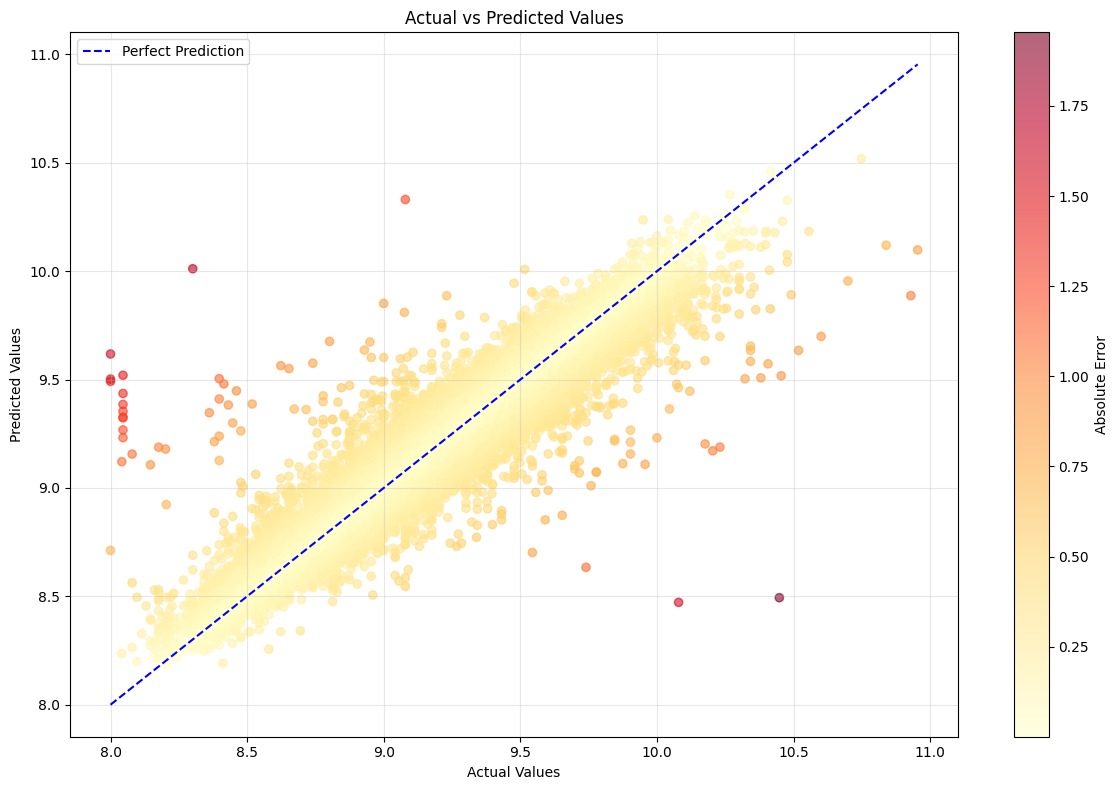

In [9]:
plot_enhanced_actual_vs_predicted(y_val, y_pred)

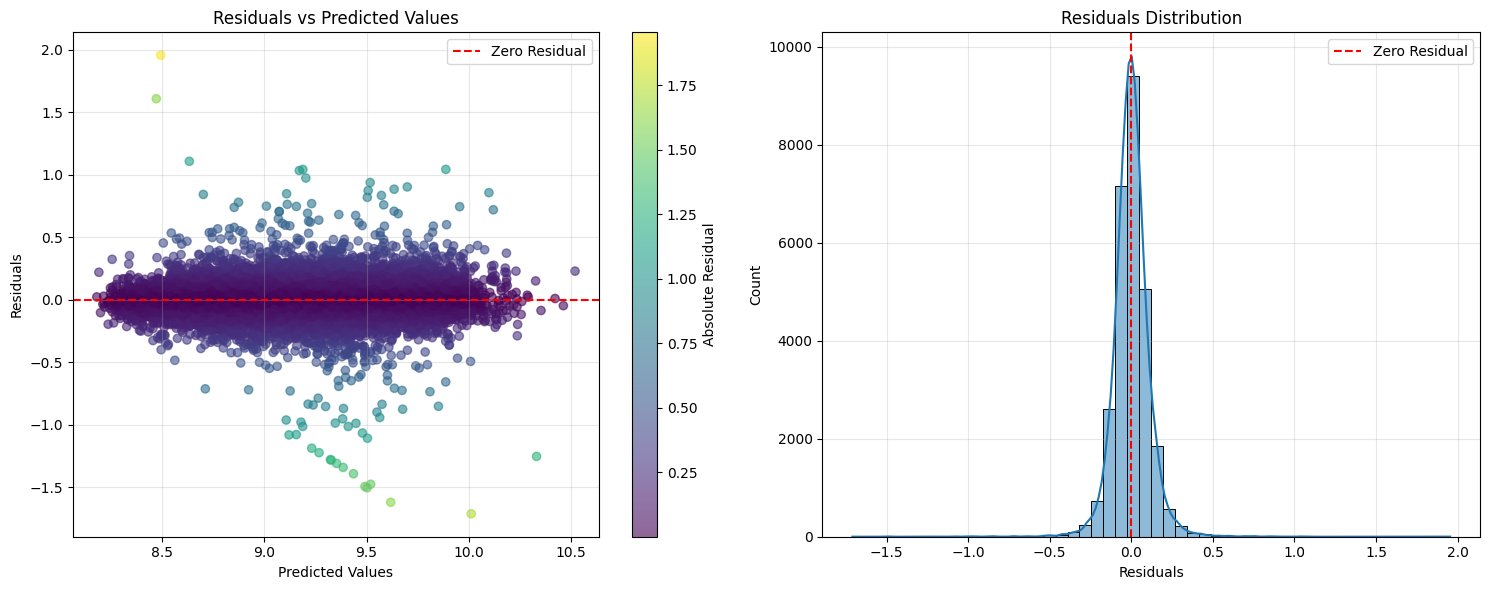

In [10]:
plot_enhanced_residuals(y_val, y_pred)

<Figure size 1200x600 with 0 Axes>

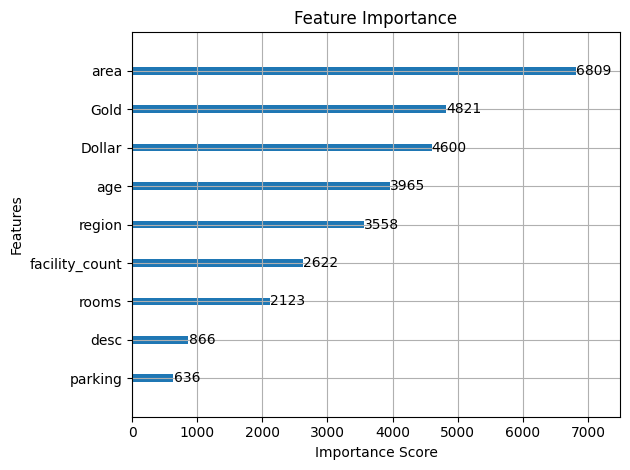

In [11]:
plot_feature_importance_lgb(model, selected_features)

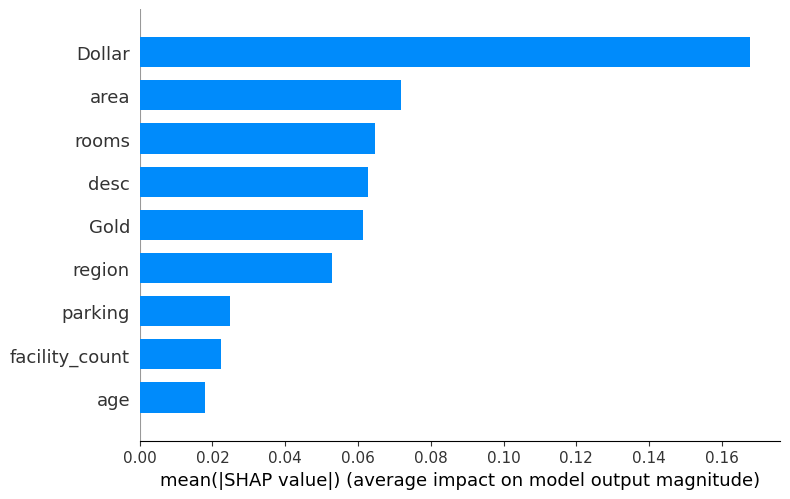

<Figure size 640x480 with 0 Axes>

In [12]:
plot_shap_summary(model, X_val)

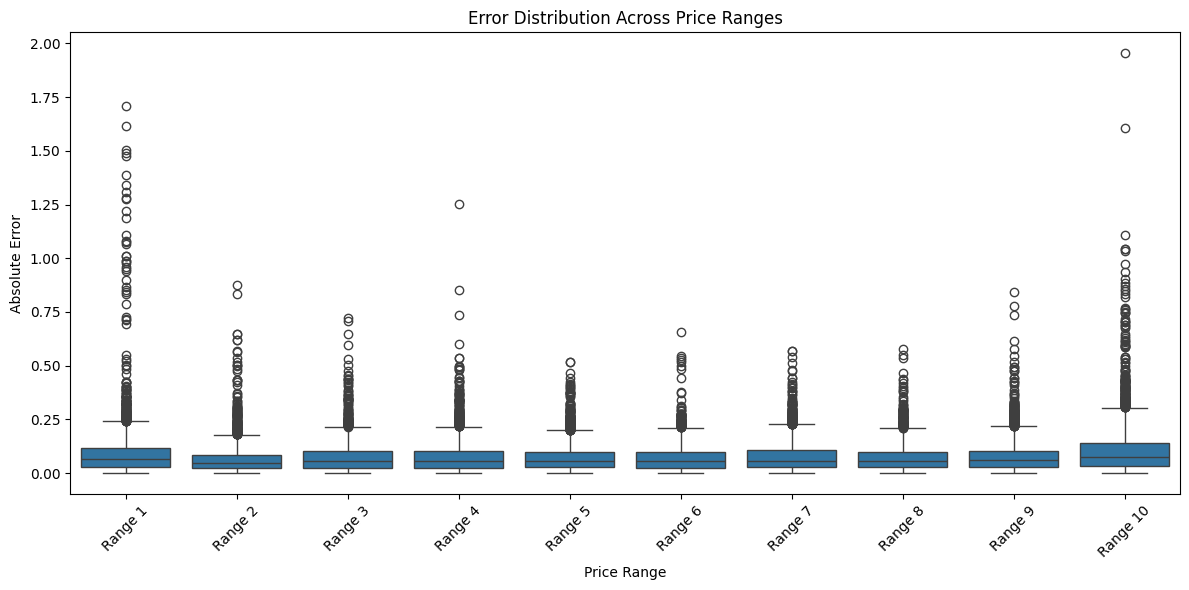

In [13]:
plot_error_distribution_by_price_range(y_val, y_pred)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

df_scaled = df_scaled[['property_direction_encoded', 'view_encoded', 'flooring_encoded', 'wall_encoded', 'cabinet_encoded', 'cooler_encoded', 'desc_encoded', 'floors_sum', 'floor_num', 'rooms', 'area', 'age', 'year', 'sequential_month', 'facility_count', 'region', 'room_area', 'G/D', 'elevator', 'parking', 'Warehouse', 'Wardrobe', 'no_elevator_high_building', 'mean_region_price', 'geram18', 'Dollar', 'area_value', 'price']]
X = df_scaled.drop(columns=['price'])
y = df_scaled['price']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Initialize LightGBM Regressor
model = lgb.LGBMRegressor(subsample= 0.8, reg_lambda= 0.5, reg_alpha= 0, num_leaves = 60, n_estimators = 1000, min_child_samples = 30, max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.6)

model.fit(X_train, y_train)


print("\nارزیابی مدل نهایی روی مجموعه آزمایشی (Test Set)...")
y_pred_test = model.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f"\nنتایج ارزیابی نهایی:")
print(f"  R² score: {r2:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")

In [ ]:
import pandas as pd
import numpy as np
# فرض می‌کنیم df, model, hf, X_train و لیست‌های ستون‌ها از قبل تعریف شده‌اند
# categorical_columns, numeric_columns, large_columns, boolean_columns

# 1. شناسایی ردیف‌هایی که قیمت ندارند
data_missing_price = df[df['price'].isna()]

if data_missing_price.empty:
    print("هیچ ردیفی با قیمت نامشخص برای پر کردن وجود ندارد.")
    df_final = df.copy() # یا هر منطق دیگری که مناسب است
else:
    print(f"تعداد ردیف‌ها با قیمت نامشخص: {len(data_missing_price)}")
    
    # دیتافریم برای نگهداری ویژگی‌های پیش‌پردازش شده برای ردیف‌های با قیمت نامشخص
    # این دیتافریم باید دقیقاً ستون‌هایی مشابه X_train داشته باشد
    X_to_predict_scaled = pd.DataFrame(index=data_missing_price.index)
    df_features_for_imputation = data_missing_price.copy() # کپی برای جلوگیری از تغییر دیتافریم اصلی در حین پردازش

    # 2. پیش‌پردازش ویژگی‌ها برای ردیف‌های با قیمت نامشخص

    # الف) ستون‌های دسته‌ای (Categorical) و عددی (Numeric)
    # بر اساس کد شما، این ستون‌ها مستقیماً از hf کپی شده بودند (بدون Min-Max scaling)
    # ما فقط مقادیر NaN را با استفاده از مد/میانه hf پر می‌کنیم
    for col in categorical_columns + numeric_columns:
        if col in df_features_for_imputation.columns:
            if df_features_for_imputation[col].isnull().any():
                if col in categorical_columns: # فرض بر این است که اینها عددی انکود شده‌اند
                    fill_value = hf[col].mode()[0] # استفاده از مد برای ستون‌های دسته‌ای
                    df_features_for_imputation[col] = df_features_for_imputation[col].fillna(fill_value)
                else: # numeric_columns
                    fill_value = hf[col].median() # استفاده از میانه برای ستون‌های عددی
                    df_features_for_imputation[col] = df_features_for_imputation[col].fillna(fill_value)
            X_to_predict_scaled[col] = df_features_for_imputation[col]

    # ب) ستون‌های بولی (Boolean)
    for col in boolean_columns:
        if col in df_features_for_imputation.columns:
            if df_features_for_imputation[col].isnull().any():
                # مقادیر NaN را با 0 (یا رایج‌ترین مقدار از hf) پر می‌کنیم
                fill_value = hf[col].mode()[0] if not hf[col].mode().empty else 0
                df_features_for_imputation[col] = df_features_for_imputation[col].fillna(fill_value)
            X_to_predict_scaled[col] = df_features_for_imputation[col].astype(int)

    # ج) ستون‌های بزرگ (ویژگی‌ها، به جز price)
    for col in large_columns:
        if col in df_features_for_imputation.columns and col != 'price': # price را پیش‌بینی خواهیم کرد
            if df_features_for_imputation[col].isnull().any():
                # مقادیر NaN را با میانه از hf (قبل از تبدیل لگاریتمی) پر می‌کنیم
                fill_value = hf[col].median()
                df_features_for_imputation[col] = df_features_for_imputation[col].fillna(fill_value)
            X_to_predict_scaled[col] = np.log1p(df_features_for_imputation[col])

    # اطمینان از اینکه ستون‌های X_to_predict_scaled دقیقاً مشابه ستون‌های X_train هستند
    # (همان ستون‌ها و همان ترتیب)
    # X_train.columns شامل نام و ترتیب ستون‌هایی است که مدل با آن‌ها آموزش دیده
    
    missing_cols_in_predict_data = set(X_train.columns) - set(X_to_predict_scaled.columns)
    if missing_cols_in_predict_data:
        # این حالت زمانی رخ می‌دهد که ستونی در X_train بوده ولی در X_to_predict_scaled ساخته نشده
        # (مثلاً اگر ستونی فقط در hf بوده و در data_missing_price اصلاً وجود نداشته)
        # باید برای این ستون‌ها مقداری در نظر گرفت (مثلاً میانه از hf یا X_train)
        print(f"هشدار: ستون‌های زیر در داده‌های آماده‌شده برای پیش‌بینی وجود ندارند و با مقدار پیش‌فرض پر می‌شوند: {missing_cols_in_predict_data}")
        for col_to_add in missing_cols_in_predict_data:
            # سعی می‌کنیم از آمار ستون مشابه در hf (داده‌های بدون NaN که برای ساخت df_scaled استفاده شد) کمک بگیریم
            if col_to_add in hf.columns:
                if col_to_add in [c for c in large_columns if c != 'price']: # اگر ستون بزرگ و لگاریتمی بوده
                    X_to_predict_scaled[col_to_add] = np.log1p(hf[col_to_add].median())
                elif col_to_add in boolean_columns:
                     X_to_predict_scaled[col_to_add] = hf[col_to_add].mode()[0] if not hf[col_to_add].mode().empty else 0
                else: # ستون‌های عددی یا دسته‌ای انکود شده
                    X_to_predict_scaled[col_to_add] = hf[col_to_add].median() if hf[col_to_add].dtype != 'object' else hf[col_to_add].mode()[0]
            else:
                 X_to_predict_scaled[col_to_add] = 0 # مقدار پیش‌فرض نهایی اگر در hf هم نبود
                 print(f"ستون {col_to_add} حتی در hf هم یافت نشد. با 0 پر شد.")


    # انتخاب و ترتیب نهایی ستون‌ها مطابق با X_train
    X_final_for_prediction = X_to_predict_scaled[X_train.columns]
    
    # بررسی نهایی برای اطمینان از عدم وجود NaN در ویژگی‌های نهایی قبل از پیش‌بینی
    if X_final_for_prediction.isnull().any().any():
        print("هشدار: هنوز مقادیر NaN در ویژگی‌های آماده برای پیش‌بینی وجود دارد. لطفاً مراحل پر کردن NaN را بازبینی کنید.")
        # به عنوان یک راه حل سریع، می‌توان NaN های باقی‌مانده را با 0 یا میانه پر کرد
        # X_final_for_prediction = X_final_for_prediction.fillna(0) # مثال
        # یا بهتر است برای هر ستون با میانه/مد خودش از X_train پر شود
        for col_nan in X_final_for_prediction.columns[X_final_for_prediction.isnull().any()]:
             fill_val_final = X_train[col_nan].median() if X_train[col_nan].dtype != 'object' else X_train[col_nan].mode()[0]
             X_final_for_prediction[col_nan] = X_final_for_prediction[col_nan].fillna(fill_val_final)


    # 3. انجام پیش‌بینی (مقادیر پیش‌بینی شده در مقیاس لگاریتمی خواهند بود)
    predicted_log_prices = model.predict(X_final_for_prediction)

    # 4. تبدیل معکوس پیش‌بینی‌ها به مقیاس اصلی قیمت
    predicted_prices_original_scale = np.expm1(predicted_log_prices)
    
    # اطمینان از اینکه مقادیر منفی تولید نمی‌شوند (هرچند بعید با log1p/expm1)
    predicted_prices_original_scale[predicted_prices_original_scale < 0] = 0 

    # 5. به‌روزرسانی دیتافریم اصلی
    # ابتدا یک کپی از df اصلی ایجاد می‌کنیم تا df اصلی دست نخورده باقی بماند
    df_final = df.copy()
    df_final.loc[data_missing_price.index, 'price'] = predicted_prices_original_scale
    
    print("مقادیر قیمت نامشخص با موفقیت پر شدند.")
    print("تعداد مقادیر NaN در ستون price پس از پر کردن:", df_final['price'].isnull().sum())

# حالا df_final شامل دیتافریم اصلی شماست که مقادیر NaN در ستون 'price' آن پر شده است.
# می‌توانید df_final.head() یا df_final.loc[data_missing_price.index].head() را برای مشاهده نتایج بررسی کنید.

In [26]:
df_final.drop(columns=['mean_region_price','price/meter','area_value'], inplace=True)
df_final['price/meter'] = df_final['price'] / df_final['area']
# تابع برای استخراج سال و فصل از تاریخ
def extract_season(date):
    if pd.isna(date):
        return (None, None)
    try:
        year, month, _ = date.split('/')
        year = int(year)
        month = int(month)
        # تعیین فصل بر اساس ماه
        if 1 <= month <= 3:
            season = 1
        elif 4 <= month <= 6:
            season = 2
        elif 7 <= month <= 9:
            season = 3
        elif 10 <= month <= 12:
            season = 4
        return year, season
    except (IndexError, ValueError, AttributeError):
        return (None, None)

# اعمال تابع برای اضافه کردن ستون‌های year و season
df_final[['year', 'season']] = df_final['date'].apply(lambda x: pd.Series(extract_season(x)))

# تبدیل year به عدد
df_final['year'] = pd.to_numeric(df_final['year'], errors='coerce')


# محاسبه میانگین قیمت برای هر سال، فصل و ناحیه
mean_price_by_year_season_area = df_final.groupby(['year', 'season', 'region'])['price/meter'].mean().reset_index()
mean_price_by_year_season_area = mean_price_by_year_season_area.rename(columns={'price/meter': 'mean_region_price'})

# ادغام میانگین با دیتافریم اصلی
df_final = df_final.merge(mean_price_by_year_season_area, on=['year', 'season', 'region'], how='left')
df_final['area_value'] = df_final['area'] * df_final['mean_region_price']


In [27]:
df_final.isna().sum()

link                              0
date                              0
address                           0
area                              0
floors_sum                        0
floor_num                         0
rooms                             0
property_direction                0
view                              0
flooring                          0
wall                              0
cabinet                           0
cooler                            0
age                               0
elevator                          0
parking                           0
desc                              0
price                             0
facilities                     9118
Dollar                            0
geram18                           0
geram24                           0
region                            0
Warehouse                         0
Wardrobe                          0
warmer                        85082
uni_facilities                15983
facility_count              

In [28]:
df_final.to_csv('filled_price.csv', encoding='utf-8-sig', index=False)